<div style = "background-color:yellow">
<h2><b>Competição DSA de Machine Learning</b></h2>
<h3><i>Edição de Fevereiro/2019</i></h3>

<p><strong>Construir um modelo preditivo capaz de prever o Energy Star Score</strong></p>

<p>Maires informações em: https://www.kaggle.com/c/competicao-dsa-machine-learning-fev-2019</p>
</div>

<b>1. Importar bibliotecas</b>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>2. Importar arquivo</b>

In [78]:
arquivo = pd.read_csv('dataset_treino.csv')

<b>3. Verificar a estrutura do data frame</b>

In [79]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 60 columns):
Order                                                         6622 non-null int64
Property Id                                                   6622 non-null int64
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6622 non-null object
Address 1 (self-reported)                                     6622 non-null object
Address 2                                                     6622 non-null object
Postal Code                                                   662

<b>4. Prévias do arquivo</b>

In [80]:
pd.set_option('display.max_columns', 60)
arquivo.head(15)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,Not Available,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,Not Available,Not Available,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,72,76.2,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
1,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,Not Available,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Building,Not Available,67,75.7,79,4,0,109.1,Not Available,Not Available,1.20478901E7,Not Available,Not Available,Not Available,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,Not Available,Not Available,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
2,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,Not Available,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.0,Not Available,Not Available,Not Available,Not Available,1911,2,100,Whole Building,Whole Building,100,68.0,Not Available,6.1,0.5,Not Available,Not Available,112138.8,Not Available,Not Available,Not Available,Not Available,8786386.9,98264.5,4013954.9,1156269.9,847.5,475,372.5,189766,Not Available,Not Available,115.6,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
3,25,4988686,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,Not Available,10021,830,PARK AVENUE,Manhattan,151666.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,130629.0,Not Available,Not Available,Not Available,Not Available,1911,1,100,Another configuration,Not Available,100,23.7,23.4,6.8,Not Available,73.3,Not Available,Not Available,Not Availa

In [81]:
arquivo.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,6622.000000,6.622000e+03,6.590000e+03,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6.622000e+03,6622.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000
mean,7420.259740,3.649956e+06,1.611635e+05,1.547783e+05,1948.317729,1.285563,99.017668,60.477348,80.122350,1.598433e+05,133.982936,40.754060,-73.955909,7.343203,16.422533,5043.087896
std,4220.064155,1.044968e+06,2.569749e+05,2.340884e+05,29.885053,3.892317,5.666364,29.440291,32.013067,2.439364e+05,59.484419,0.082595,0.044884,3.952419,15.864064,13028.985484
min,21.000000,7.365000e+03,5.002800e+04,3.800000e+03,1649.000000,0.000000,0.000000,1.000000,0.000000,1.200000e+02,0.000000,40.521360,-74.224464,1.000000,1.000000,1.000000
25%,3695.250000,2.769788e+06,6.519200e+04,6.600000e+04,1927.000000,1.000000,100.000000,38.000000,62.700000,6.700000e+04,100.000000,40.701918,-73.983939,5.000000,4.000000,105.000000
50%,7374.500000,3.324127e+06,9.161600e+04,9.100000e+04,1940.000000,1.000000,100.000000,66.000000,78.500000,9.299800e+04,123.650000,40.759206,-73.962474,7.000000,10.000000,218.000000
75%,11165.000000,4.409690e+06,1.551560e+05,1.514815e+05,1964.000000,1.000000,100.000000,86.000000,95.900000,1.554812e+05,157.200000,40.822984,-73.929310,10.000000,33.000000,549.000000
max,14993.000000,5.990844e+06,8.512479e+06,6.940450e+06,2019.000000,140.000000,100.000000,100.000000,204.800000,6.940450e+06,576.800000,40.911797,-73.749057,18.000000,51.000000,105804.000000


<b>5. Tratamento dos dados</b>

In [82]:
# Lista de colunas unicamente numéricas
fs = ['DOF Gross Floor Area', 
'Largest Property Use Type - Gross Floor Area (ft²)',
'Year Built',
'Number of Buildings - Self-reported',
'Occupancy',
'Site EUI (kBtu/ft²)',
'Property GFA - Self-Reported (ft²)',
'Source EUI (kBtu/ft²)',
'Water Required?',
'DOF Benchmarking Submission Status',
'Community Board',
'Council District',
'Census Tract',
'ENERGY STAR Score']

In [83]:
# Gerar data frame somente com colunas numéricas
df = arquivo[fs].copy()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 14 columns):
DOF Gross Floor Area                                  6590 non-null float64
Largest Property Use Type - Gross Floor Area (ft²)    6622 non-null float64
Year Built                                            6622 non-null int64
Number of Buildings - Self-reported                   6622 non-null int64
Occupancy                                             6622 non-null int64
Site EUI (kBtu/ft²)                                   6622 non-null float64
Property GFA - Self-Reported (ft²)                    6622 non-null int64
Source EUI (kBtu/ft²)                                 6622 non-null float64
Water Required?                                       6579 non-null object
DOF Benchmarking Submission Status                    6605 non-null object
Community Board                                       5370 non-null float64
Council District                                      5370 non-null

In [85]:
df.describe()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Community Board,Council District,Census Tract,ENERGY STAR Score
count,6.590000e+03,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6.622000e+03,6622.000000,5370.000000,5370.000000,5370.000000,6622.000000
mean,1.611635e+05,1.547783e+05,1948.317729,1.285563,99.017668,80.122350,1.598433e+05,133.982936,7.343203,16.422533,5043.087896,60.477348
std,2.569749e+05,2.340884e+05,29.885053,3.892317,5.666364,32.013067,2.439364e+05,59.484419,3.952419,15.864064,13028.985484,29.440291
min,5.002800e+04,3.800000e+03,1649.000000,0.000000,0.000000,0.000000,1.200000e+02,0.000000,1.000000,1.000000,1.000000,1.000000
25%,6.519200e+04,6.600000e+04,1927.000000,1.000000,100.000000,62.700000,6.700000e+04,100.000000,5.000000,4.000000,105.000000,38.000000
50%,9.161600e+04,9.100000e+04,1940.000000,1.000000,100.000000,78.500000,9.299800e+04,123.650000,7.000000,10.000000,218.000000,66.000000
75%,1.551560e+05,1.514815e+05,1964.000000,1.000000,100.000000,95.900000,1.554812e+05,157.200000,10.000000,33.000000,549.000000,86.000000
max,8.512479e+06,6.940450e+06,2019.000000,140.000000,100.000000,204.800000,6.940450e+06,576.800000,18.000000,51.000000,105804.000000,100.000000


In [86]:
# Verificar se o dataframe possui valores NA:
df.isna().sum()

DOF Gross Floor Area                                    32
Largest Property Use Type - Gross Floor Area (ft²)       0
Year Built                                               0
Number of Buildings - Self-reported                      0
Occupancy                                                0
Site EUI (kBtu/ft²)                                      0
Property GFA - Self-Reported (ft²)                       0
Source EUI (kBtu/ft²)                                    0
Water Required?                                         43
DOF Benchmarking Submission Status                      17
Community Board                                       1252
Council District                                      1252
Census Tract                                          1252
ENERGY STAR Score                                        0
dtype: int64

<b>5. Tratar os valores NA de df</b>

In [87]:
# Identificar perfil de valores da variável target
df['ENERGY STAR Score'].describe()

count    6622.000000
mean       60.477348
std        29.440291
min         1.000000
25%        38.000000
50%        66.000000
75%        86.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [88]:
# Identificar o perfil da variável DOF Gross Floor Area
df['DOF Gross Floor Area'].describe()

count    6.590000e+03
mean     1.611635e+05
std      2.569749e+05
min      5.002800e+04
25%      6.519200e+04
50%      9.161600e+04
75%      1.551560e+05
max      8.512479e+06
Name: DOF Gross Floor Area, dtype: float64

In [89]:
# Perfil da variável ENERGY STAR Score com valores NA em DOF Gross Floor Area
df[df['DOF Gross Floor Area'].isnull()]['ENERGY STAR Score'].describe()

count     32.000000
mean      57.437500
std       35.876974
min        1.000000
25%       22.250000
50%       69.500000
75%       94.500000
max      100.000000
Name: ENERGY STAR Score, dtype: float64

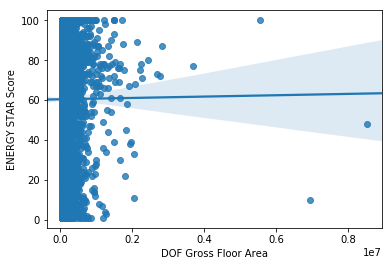

In [90]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "DOF Gross Floor Area", y = "ENERGY STAR Score", fit_reg = True, data = df)

In [91]:
# Como a variável target varia do mínimo até o máximo quando DOF Gross Floor Area é NaN
# vou substituir NaN pelo seu valor mínimo
df['DOF Gross Floor Area'].fillna((df['DOF Gross Floor Area'].min()), inplace = True)

In [92]:
# Checar o resultado:
df['DOF Gross Floor Area'].isna().sum()

0

In [93]:
# Identificar o perfil da variável Water Required
df['Water Required?'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [94]:
# df da variável ENERGY STAR Score com valores NA em Water Required?
df[arquivo['Water Required?'].isnull()]['ENERGY STAR Score'].describe()

count     43.000000
mean      67.232558
std       35.639623
min        2.000000
25%       36.500000
50%       86.000000
75%      100.000000
max      100.000000
Name: ENERGY STAR Score, dtype: float64

In [95]:
# Substituir NA por No
df['Water Required?'].fillna('No', inplace = True)

In [96]:
# Verificar o resultado
df['Water Required?'].isna().sum()

0

In [97]:
# Substituir Yes por 1 e No por zero em Water Required?
df['Water Required?'].replace(
    to_replace = ['Yes'],
    value = 1,
    inplace = True)

df['Water Required?'].replace(
    to_replace = ['No'],
    value = 0,
    inplace = True)

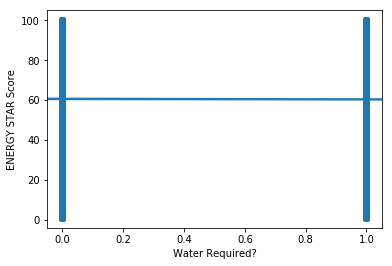

In [98]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "Water Required?", y = "ENERGY STAR Score", fit_reg = True, data = df)

In [99]:
# Identificar o perfil da variável DOF Benchmarking Submission Status
df['DOF Benchmarking Submission Status'].unique()

array(['In Compliance', nan], dtype=object)

In [100]:
# Substituir o termo 'In Compliance' por 1 e demais por zero
df['DOF Benchmarking Submission Status'] = df['DOF Benchmarking Submission Status'].map({'In Compliance': 1, 'nan': 0})

In [101]:
# Substituir NA por zero
df['DOF Benchmarking Submission Status'].fillna(0, inplace = True)

In [102]:
# Verificar o resultado
df['DOF Benchmarking Submission Status'].isna().sum()

0

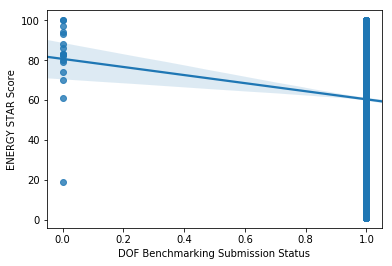

In [103]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "DOF Benchmarking Submission Status", y = "ENERGY STAR Score", fit_reg = True, data = df)

In [104]:
# Identificar o perfil da variável Community Board
df[df['Community Board'].isna()].describe()
# Quando Community Board é NaN, Council District e Census Tract também são, checar se essas
# variáveis estão relacionadas

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,ENERGY STAR Score
count,1.252000e+03,1.252000e+03,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1252.000000,1252.000000,1252.000000,0.0,0.0,0.0,1252.000000
mean,1.456487e+05,1.449413e+05,1955.871406,2.126198,99.113419,79.863179,1.465375e+05,122.812460,0.708466,0.996805,NaN,NaN,NaN,62.517572
std,2.499970e+05,2.684564e+05,23.911312,8.418038,5.722457,34.820310,2.704235e+05,54.813225,0.454650,0.056456,NaN,NaN,NaN,28.839375
min,5.002800e+04,2.600000e+04,1649.000000,1.000000,0.000000,0.000000,1.995400e+04,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
25%,6.500000e+04,6.701650e+04,1940.000000,1.000000,100.000000,62.200000,6.786975e+04,94.675000,0.000000,1.000000,NaN,NaN,NaN,41.000000
50%,9.551950e+04,9.592450e+04,1954.000000,1.000000,100.000000,80.250000,9.768200e+04,118.700000,1.000000,1.000000,NaN,NaN,NaN,68.000000
75%,1.500000e+05,1.480165e+05,1964.000000,1.000000,100.000000,96.725000,1.500000e+05,144.150000,1.000000,1.000000,NaN,NaN,NaN,87.000000
max,6.940450e+06,6.940450e+06,2016.000000,140.000000,100.000000,204.800000,6.940450e+06,576.800000,1.000000,1.000000,NaN,NaN,NaN,100.000000


In [105]:
# Council District
df['Community Board'].corr(arquivo['Council District'])
# Fracamente correlacionada

0.4769824236640178

In [106]:
# Census Tract
df['Community Board'].corr(arquivo['Census Tract'])
# Não está correlacionada

0.18149025210494235

In [107]:
# Identificar o perfil da variável Community Board com valores NaN
df['Community Board'].describe()

count    5370.000000
mean        7.343203
std         3.952419
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        18.000000
Name: Community Board, dtype: float64

In [108]:
# Perfil da variável ENERGY STAR Score com valores NA em Community Board
df[df['Community Board'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [109]:
# Perfil da variável ENERGY STAR Score sem valores NA em Community Board
df[df['Community Board'] >= 1]['ENERGY STAR Score'].describe()

count    5370.000000
mean       60.001676
std        29.561043
min         1.000000
25%        37.000000
50%        65.000000
75%        85.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

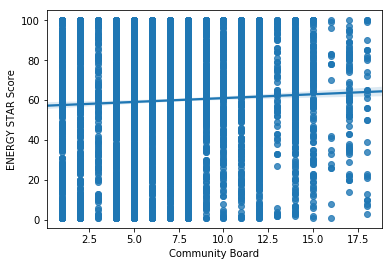

In [110]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = 'Community Board', y = 'ENERGY STAR Score', fit_reg = True, data = df)

In [111]:
# Substituir NA pelo valor mínimo
df['Community Board'].fillna(df['Community Board'].min(), inplace = True)

In [112]:
# Verificar o resultado
df['Community Board'].isna().sum()

0

In [113]:
# Identificar o perfil da variável Council District
arquivo['Council District'].unique()

array([nan, 10.,  4.,  8.,  7.,  1., 11., 12., 47.,  9., 41.,  3., 49.,
        6., 18., 35., 51., 34., 17., 15.,  2.,  5., 16., 14., 33., 13.,
       39., 38., 40., 36., 37., 42., 45., 44., 43., 48., 46., 30., 29.,
       31., 32., 50.])

In [114]:
arquivo['Council District'].describe()

count    5370.000000
mean       16.422533
std        15.864064
min         1.000000
25%         4.000000
50%        10.000000
75%        33.000000
max        51.000000
Name: Council District, dtype: float64

In [115]:
# Perfil da variável ENERGY STAR Score com valores NA em Water Required?
df[df['Council District'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [116]:
# Perfil da variável ENERGY STAR Score com valores NA em Water Required?
df[df['Council District'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [117]:
# Substituir NA pelo mínimo
df['Council District'].fillna(df['Council District'].mean(), inplace = True)

In [118]:
# Verificar o resultado
df['Council District'].isna().sum()

0

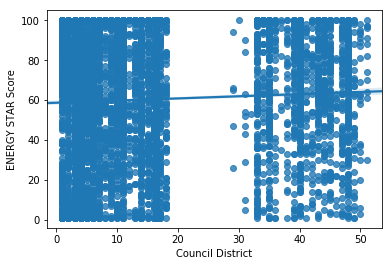

In [119]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "Council District", y = "ENERGY STAR Score", fit_reg = True, data = df)

In [120]:
# Identificar o perfil da variável Census Tract
df['Census Tract'].describe()

count      5370.000000
mean       5043.087896
std       13028.985484
min           1.000000
25%         105.000000
50%         218.000000
75%         549.000000
max      105804.000000
Name: Census Tract, dtype: float64

In [121]:
# Perfil da variável ENERGY STAR Score com valores NA em Census Tract
df[df['Census Tract'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

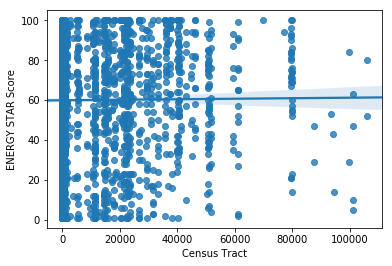

In [122]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = 'Census Tract', y = "ENERGY STAR Score", fit_reg = True, data = df)

In [123]:
# Substituir Na pelo mínimo
df['Census Tract'].fillna(df['Census Tract'].min(), inplace = True)

In [124]:
# Verificar o resultado
df['Census Tract'].isna().sum()

0

In [125]:
# Dados do dataframe:
df.describe()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,ENERGY STAR Score
count,6.622000e+03,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000
mean,1.606265e+05,1.547783e+05,1948.317729,1.285563,99.017668,80.122350,1.598433e+05,133.982936,0.645877,0.997433,6.143914,16.422533,4089.796738,60.477348
std,2.564690e+05,2.340884e+05,29.885053,3.892317,5.666364,32.013067,2.439364e+05,59.484419,0.478283,0.050606,4.340232,14.285629,11897.608738,29.440291
min,5.002800e+04,3.800000e+03,1649.000000,0.000000,0.000000,0.000000,1.200000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,6.500000e+04,6.600000e+04,1927.000000,1.000000,100.000000,62.700000,6.700000e+04,100.000000,0.000000,1.000000,2.000000,4.000000,50.000000,38.000000
50%,9.110750e+04,9.100000e+04,1940.000000,1.000000,100.000000,78.500000,9.299800e+04,123.650000,1.000000,1.000000,6.000000,14.000000,159.000000,66.000000
75%,1.545135e+05,1.514815e+05,1964.000000,1.000000,100.000000,95.900000,1.554812e+05,157.200000,1.000000,1.000000,9.000000,16.422533,430.000000,86.000000
max,8.512479e+06,6.940450e+06,2019.000000,140.000000,100.000000,204.800000,6.940450e+06,576.800000,1.000000,1.000000,18.000000,51.000000,105804.000000,100.000000


<b>6. Identificar melhores variáveis preditoras</b>

In [126]:
# Tabular as correlações com alvo
df.corr()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,ENERGY STAR Score
DOF Gross Floor Area,1.000000,0.895674,0.138135,0.054449,-0.057348,0.040055,0.902799,0.158471,-0.074050,0.011358,-0.101051,-0.139297,-0.031899,0.003154
Largest Property Use Type - Gross Floor Area (ft²),0.895674,1.000000,0.128308,0.066585,-0.061738,0.033005,0.993997,0.145634,-0.078162,0.011273,-0.105186,-0.145998,-0.039967,0.014289
Year Built,0.138135,0.128308,1.000000,0.022434,0.001045,-0.002224,0.129072,0.079919,-0.029068,-0.029520,-0.100918,0.105423,-0.017941,-0.121421
Number of Buildings - Self-reported,0.054449,0.066585,0.022434,1.000000,0.008920,0.007724,0.062600,-0.013941,-0.007817,-0.009313,-0.053581,0.018060,-0.008864,-0.020088
Occupancy,-0.057348,-0.061738,0.001045,0.008920,1.000000,0.054838,-0.063886,-0.014422,0.033239,-0.003529,0.058564,0.055983,0.025590,-0.042779
Site EUI (kBtu/ft²),0.040055,0.033005,-0.002224,0.007724,0.054838,1.000000,0.036530,0.800262,0.007080,0.018914,0.019492,-0.031192,0.015999,-0.725326
Property GFA - Self-Reported (ft²),0.902799,0.993997,0.129072,0.062600,-0.063886,0.036530,1.000000,0.160289,-0.084754,0.011468,-0.106905,-0.153502,-0.041569,0.013894
Source EUI (kBtu/ft²),0.158471,0.145634,0.079919,-0.013941,-0.014422,0.800262,0.160289,1.000000,-0.077062,-0.002468,-0.100598,-0.183826,-0.048417,-0.639500
Water Required?,-0.074050,-0.078162,-0.029068,-0.007817,0.033239,0.007080,-0.084754,-0.077062,1.000000,0.024835,0.044199,0.083902,0.025617,-0.003836
DOF Benchmarking Submission Status,0.011358,0.011273,-0.029520,-0.009313,-0.003529,0.018914,0.011468,-0.002468,0.024835,1.000000,0.037439,-0.062572,-0.013079,-0.034861


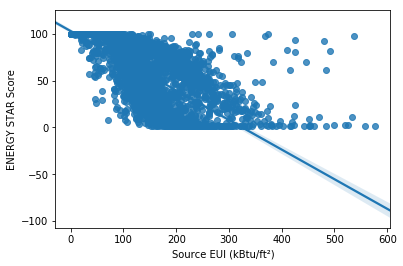

In [127]:
sns.regplot(x = 'Source EUI (kBtu/ft²)', y = 'ENERGY STAR Score', fit_reg = True, data = df)

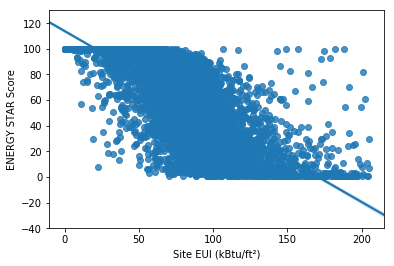

In [128]:
sns.regplot(x = 'Site EUI (kBtu/ft²)', y = 'ENERGY STAR Score', fit_reg = True, data = df)

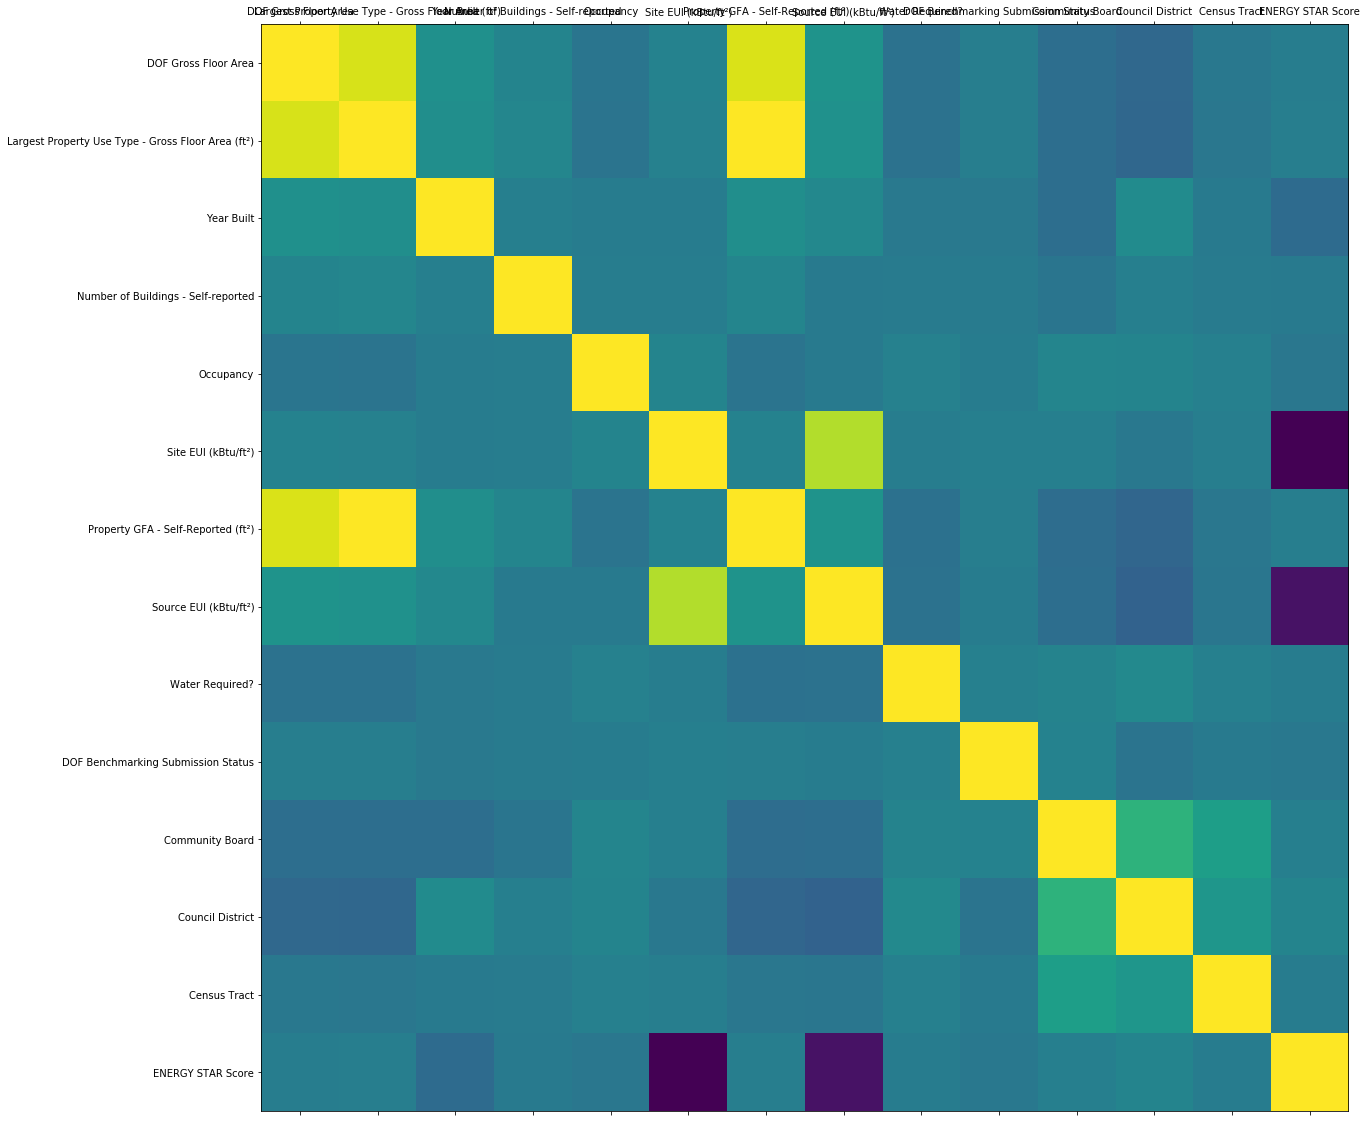

In [129]:
def plot_corr(arquivo, size = 20):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

plot_corr(arquivo)

<p>Conforme acima, os campos com maior correlação, negativa diga-se de passagem, são (ordem crescente):
Source EUI (kBtu/ft²) e Site EUI (kBtu/ft²). Essas variáveis não possuíam valores NaN.</p>
<p>Assim, o modelo será criado com base nelas.</p>

<b>Feature selection</b>

In [130]:
# Confirmar a análise acima com feature selection
# 1. Copiar o data frame para outro
df2 = df.copy()
df2.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,ENERGY STAR Score
0,50028.0,321464.0,1939,2,100,76.2,321464,103.3,1,1.0,1.0,16.422533,1.0,72
1,179130.0,204720.0,1939,1,100,75.7,204720,106.6,0,1.0,12.0,10.000000,281.0,67
2,50028.0,189766.0,1911,2,100,68.0,189766,115.6,1,1.0,1.0,16.422533,1.0,100
3,151666.0,130629.0,1911,1,100,23.7,130629,74.3,0,1.0,8.0,4.000000,130.0,100
4,64827.0,54913.0,1911,1,100,17.9,54913,53.9,1,1.0,8.0,4.000000,130.0,100


In [131]:
# Fazer a seleção com novo dataframe
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataframe = df2
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
# Extrair as variáveis
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
placares = fit.scores_

In [132]:
lista_colunas = ['DOF Gross Floor Area', 
'Largest Property Use Type - Gross Floor Area (ft²)',
'Year Built',
'Number of Buildings - Self-reported',
'Occupancy',
'Site EUI (kBtu/ft²)',
'Property GFA - Self-Reported (ft²)',
'Source EUI (kBtu/ft²)',
'Water Required?',
'DOF Benchmarking Submission Status',
'Community Board',
'Council District',
'Census Tract']

In [133]:
# Melhores preditores
nome_colunas = ['Variável', 'Placar']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = lista_colunas
var_x_coef['Placar']   = placares.astype('int64')
var_x_coef.head(10)

var_x_coef.sort_values(by='Placar', ascending=False)

,Variável,Placar
0,DOF Gross Floor Area,54849522
6,Property GFA - Self-Reported (ft²),44549596
1,Largest Property Use Type - Gross Floor Area (...,41239255
12,Census Tract,3275180
7,Source EUI (kBtu/ft²),84447
5,Site EUI (kBtu/ft²),50656
11,Council District,1605
3,Number of Buildings - Self-reported,1505
10,Community Board,416
2,Year Built,101


In [134]:
# Três melhores preditores
tres_preditores = ['DOF Gross Floor Area', 
                   'Property GFA - Self-Reported (ft²)', 
                   'Largest Property Use Type - Gross Floor Area (ft²)']

In [135]:
# Quatro melhores preditores
quatro_preditores = ['DOF Gross Floor Area', 
                     'Property GFA - Self-Reported (ft²)', 
                     'Largest Property Use Type - Gross Floor Area (ft²)', 
                     'Census Tract']

In [136]:
# Cinco melhores preditores
cinco_preditores = ['DOF Gross Floor Area', 
                     'Property GFA - Self-Reported (ft²)', 
                     'Largest Property Use Type - Gross Floor Area (ft²)', 
                     'Census Tract',
                     'Source EUI (kBtu/ft²)']

In [137]:
# Seis melhores preditores
seis_preditores = ['DOF Gross Floor Area', 
                     'Property GFA - Self-Reported (ft²)', 
                     'Largest Property Use Type - Gross Floor Area (ft²)', 
                     'Census Tract',
                     'Source EUI (kBtu/ft²)',
                     'Site EUI (kBtu/ft²)']

<b>7. Treinando o modelo</b>

In [138]:
# Marcar como Y o valor do alvo:
y = df['ENERGY STAR Score']

In [139]:
# Criar quatro conjuntos de treinamento
X3 = df[tres_preditores]
X4 = df[quatro_preditores]
X5 = df[cinco_preditores]
X6 = df[seis_preditores]

In [140]:
# Visualizar primeiros registros de cada novo df
X3.head()

,DOF Gross Floor Area,Property GFA - Self-Reported (ft²),Largest Property Use Type - Gross Floor Area (ft²)
0,50028.0,321464,321464.0
1,179130.0,204720,204720.0
2,50028.0,189766,189766.0
3,151666.0,130629,130629.0
4,64827.0,54913,54913.0


In [141]:
X4.head()

,DOF Gross Floor Area,Property GFA - Self-Reported (ft²),Largest Property Use Type - Gross Floor Area (ft²),Census Tract
0,50028.0,321464,321464.0,1.0
1,179130.0,204720,204720.0,281.0
2,50028.0,189766,189766.0,1.0
3,151666.0,130629,130629.0,130.0
4,64827.0,54913,54913.0,130.0


In [142]:
X5.head()

,DOF Gross Floor Area,Property GFA - Self-Reported (ft²),Largest Property Use Type - Gross Floor Area (ft²),Census Tract,Source EUI (kBtu/ft²)
0,50028.0,321464,321464.0,1.0,103.3
1,179130.0,204720,204720.0,281.0,106.6
2,50028.0,189766,189766.0,1.0,115.6
3,151666.0,130629,130629.0,130.0,74.3
4,64827.0,54913,54913.0,130.0,53.9


In [143]:
X6.head()

,DOF Gross Floor Area,Property GFA - Self-Reported (ft²),Largest Property Use Type - Gross Floor Area (ft²),Census Tract,Source EUI (kBtu/ft²),Site EUI (kBtu/ft²)
0,50028.0,321464,321464.0,1.0,103.3,76.2
1,179130.0,204720,204720.0,281.0,106.6,75.7
2,50028.0,189766,189766.0,1.0,115.6,68.0
3,151666.0,130629,130629.0,130.0,74.3,23.7
4,64827.0,54913,54913.0,130.0,53.9,17.9


In [144]:
# Dividir os dados em treino e teste um para cada novo dataframe
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.3, random_state = 101)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.3, random_state = 101)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size = 0.3, random_state = 101)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size = 0.3, random_state = 101)

In [145]:
# Criar instância do modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

<b>7.1. Primeiro modelo</b>

In [146]:
# Treinar o primeiro modelo
lm.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
# Tabular os coeficientes em dataframe
nome_colunas = ['Variável', 'Coeficiente']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = tres_preditores
var_x_coef['Coeficiente'] = lm.coef_
var_x_coef.head(10)

,Variável,Coeficiente
0,DOF Gross Floor Area,-0.000002
1,Property GFA - Self-Reported (ft²),0.000013
2,Largest Property Use Type - Gross Floor Area (...,-0.000009


In [148]:
# Fazer as previsões
predictions = lm.predict(X3_test)

Text(0,0.5,'Predicted Y')

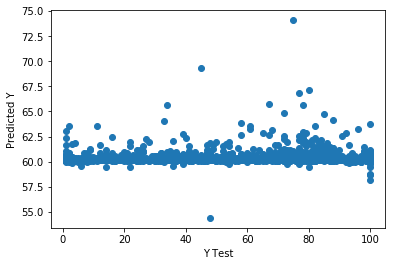

In [149]:
# Visualizar a dispersão
plt.scatter(y3_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


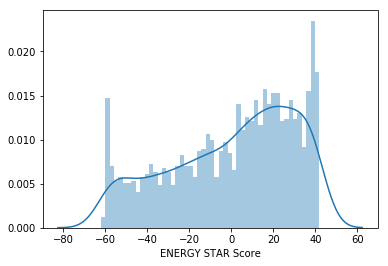

In [150]:
# Avaliar o modelo
sns.distplot((y3_test-predictions),bins=50)

In [151]:
# Valor MAE
from sklearn import metrics
print('MAE primeiro modelo:', metrics.mean_absolute_error(y3_test, predictions))

MAE primeiro modelo: 25.029961580654618


<b>7.2. Segundo modelo</b>

In [152]:
# Treinar o primeiro modelo
lm.fit(X4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
# Tabular os coeficientes em dataframe
nome_colunas = ['Variável', 'Coeficiente']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = quatro_preditores
var_x_coef['Coeficiente'] = lm.coef_
var_x_coef.head(10)

,Variável,Coeficiente
0,DOF Gross Floor Area,-2.096115e-06
1,Property GFA - Self-Reported (ft²),1.282350e-05
2,Largest Property Use Type - Gross Floor Area (...,-8.982511e-06
3,Census Tract,-2.110593e-07


In [154]:
# Fazer as previsões
predictions = lm.predict(X4_test)

Text(0,0.5,'Predicted Y')

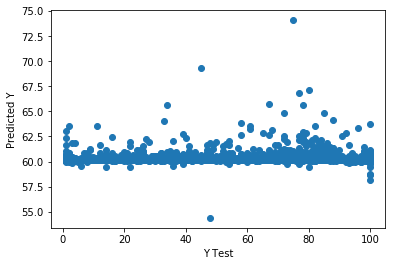

In [155]:
# Visualizar a dispersão
plt.scatter(y4_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


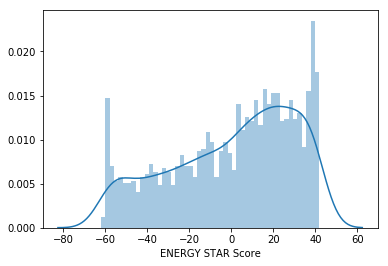

In [156]:
# Avaliar o modelo
sns.distplot((y4_test-predictions), bins=50)

In [157]:
# Valor MAE
print('MAE segundo modelo:', metrics.mean_absolute_error(y4_test, predictions))

MAE segundo modelo: 25.02992441676971


<b>7.3. Terceiro modelo</b>

In [158]:
# Treinar o primeiro modelo
lm.fit(X5_train, y5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
# Tabular os coeficientes em dataframe
nome_colunas = ['Variável', 'Coeficiente']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = cinco_preditores
var_x_coef['Coeficiente'] = lm.coef_
var_x_coef.head(10)

,Variável,Coeficiente
0,DOF Gross Floor Area,0.000008
1,Property GFA - Self-Reported (ft²),0.000114
2,Largest Property Use Type - Gross Floor Area (...,-0.000112
3,Census Tract,-0.000069
4,Source EUI (kBtu/ft²),-0.327530


In [160]:
# Fazer as previsões
predictions = lm.predict(X5_test)

Text(0,0.5,'Predicted Y')

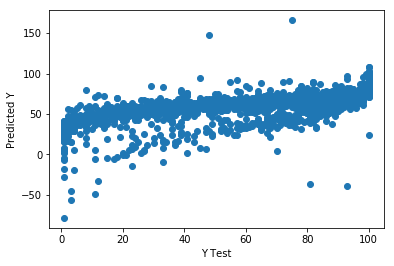

In [161]:
# Visualizar a dispersão
plt.scatter(y5_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


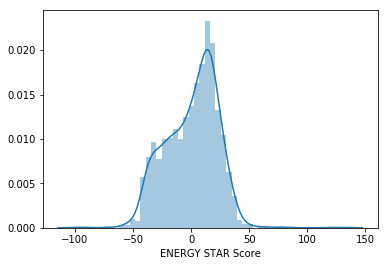

In [162]:
# Avaliar o modelo
sns.distplot((y5_test-predictions), bins=50)

In [163]:
# Valor MAE
print('MAE terceiro modelo:', metrics.mean_absolute_error(y5_test, predictions))

MAE terceiro modelo: 18.35510714525011


<b>7.4. Quarto modelo</b>

In [164]:
# Treinar o primeiro modelo
lm.fit(X6_train, y6_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
# Tabular os coeficientes em dataframe
nome_colunas = ['Variável', 'Coeficiente']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = seis_preditores
var_x_coef['Coeficiente'] = lm.coef_
var_x_coef.head(10)

,Variável,Coeficiente
0,DOF Gross Floor Area,0.000004
1,Property GFA - Self-Reported (ft²),0.000056
2,Largest Property Use Type - Gross Floor Area (...,-0.000054
3,Census Tract,0.000004
4,Source EUI (kBtu/ft²),-0.091266
5,Site EUI (kBtu/ft²),-0.528038


In [166]:
# Fazer as previsões
predictions = lm.predict(X6_test)

Text(0,0.5,'Predicted Y')

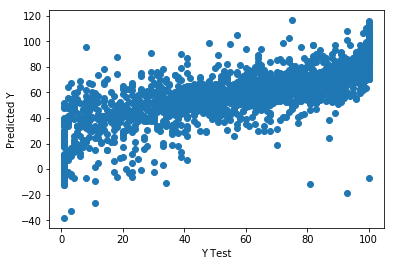

In [167]:
# Visualizar a dispersão
plt.scatter(y6_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


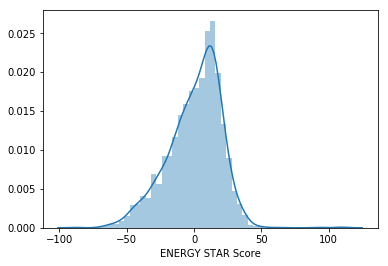

In [168]:
# Avaliar o modelo
sns.distplot((y6_test-predictions), bins=50)

In [171]:
# Valor MAE
print('MAE quarto modelo:', metrics.mean_absolute_error(y6_test, predictions))

MAE quarto modelo: 15.768491910079305


In [175]:
# Como o indicador MAE foi melhorando a medida que as últimas variáveis foram apresentadas, 
# criar um novo modelo somente com as três últimas
last_predictors = ['Census Tract', 'Source EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']

X7 = df[last_predictors]

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size = 0.3, random_state = 101)

# Treinar o modelo
lm.fit(X7_train, y7_train)

# Fazer as previsões
predictions = lm.predict(X7_test)

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


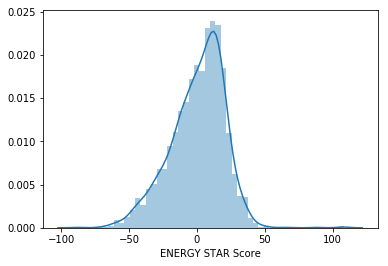

In [176]:
# Avaliar o modelo
sns.distplot((y7_test - predictions), bins = 50)

In [177]:
# Valor MAE
print('MAE último modelo:', metrics.mean_absolute_error(y7_test, predictions))
# Verifica-se que o modelo com seis variáveis possui desempenho pouco superior.

MAE último modelo: 15.825899196233438


,DOF Gross Floor Area,Property GFA - Self-Reported (ft²),Largest Property Use Type - Gross Floor Area (ft²),Census Tract,Source EUI (kBtu/ft²),Site EUI (kBtu/ft²)
0,50028.0,321464,321464.0,1.0,103.3,76.2
1,179130.0,204720,204720.0,281.0,106.6,75.7
2,50028.0,189766,189766.0,1.0,115.6,68.0
3,151666.0,130629,130629.0,130.0,74.3,23.7
4,64827.0,54913,54913.0,130.0,53.9,17.9


In [ ]:
# Padronizar os dados
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

df_padronizado = scaler.fit_transform(X6)
df_padronizado = pd.DataFrame(df_padronizado)

In [180]:
df_padronizado.head()

,0,1,2,3,4,5
0,-0.431268,0.662603,0.712117,-0.343691,-0.515854,-0.122533
1,0.072153,0.183983,0.213361,-0.320155,-0.460373,-0.138152
2,-0.431268,0.122675,0.149475,-0.343691,-0.309061,-0.378697
3,-0.034940,-0.119771,-0.103171,-0.332848,-1.003413,-1.762612
4,-0.373560,-0.430187,-0.426646,-0.332848,-1.346386,-1.943802


In [182]:
df_padronizado.describe()

,0,1,2,3,4,5
count,6.622000e+03,6.622000e+03,6.622000e+03,6.622000e+03,6.622000e+03,6.622000e+03
mean,2.755020e-16,-4.408534e-17,9.458356e-17,3.612752e-16,2.066537e-16,2.051113e-16
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-4.312677e-01,-6.548236e-01,-6.450116e-01,-3.436914e-01,-2.252574e+00,-2.502990e+00
25%,-3.728859e-01,-3.806331e-01,-3.792800e-01,-3.395726e-01,-5.713345e-01,-5.442673e-01
50%,-2.710823e-01,-2.740481e-01,-2.724746e-01,-3.304104e-01,-1.737214e-01,-5.068156e-02
75%,-2.383687e-02,-1.788311e-02,-1.408480e-02,-3.076310e-01,3.903344e-01,4.928875e-01
max,3.256722e+01,2.779871e+01,2.898983e+01,8.549776e+00,7.444815e+00,3.894880e+00


In [183]:
df_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 6 columns):
0    6622 non-null float64
1    6622 non-null float64
2    6622 non-null float64
3    6622 non-null float64
4    6622 non-null float64
5    6622 non-null float64
dtypes: float64(6)
memory usage: 310.5 KB


In [184]:
X8 = df_padronizado

X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size = 0.3, random_state = 101)

# Treinar o modelo
lm.fit(X8_train, y8_train)

# Fazer as previsões
predictions = lm.predict(X8_test)

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


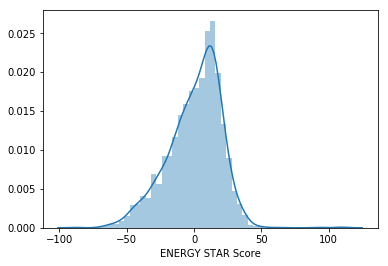

In [185]:
# Avaliar o modelo
sns.distplot((y8_test - predictions), bins = 50)

In [186]:
# Valor MAE
from sklearn import metrics
print('MAE modelo normalizado:', metrics.mean_absolute_error(y8_test, predictions))

MAE modelo normalizado: 15.768491910079316


<b>8. Preparar resposta ao Kaggle</b>

<b>8.1. Importar arquivo de teste</b>

In [ ]:
arq_teste = pd.read_csv('dataset_teste.csv')

<b>8.2. Visualizar dados do arquivo de teste e identificar eventuais necessidades de tratamento</b>

In [ ]:
arq_teste.info()

In [ ]:
colunas_teste = ['Site EUI (kBtu/ft²)', 
            'Source EUI (kBtu/ft²)']
arq_teste[colunas_teste].describe()

<b>8.3. Excluir as mesmas colunas do arquivo de teste</b>

In [ ]:
# Antes de excluir, armazenar os valores de Property Id
proprietarios = arq_teste['Property Id']

In [ ]:
# Gerar novo data frame com somente as variáveis preditoras
arq_teste2 = arq_teste[colnames]

In [ ]:
# Gerar o modelo novamente mas com todas as variáveis preditoras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 101)
lm = LinearRegression()
lm.fit(X_train, y_train)

<b>8.4. Identificar a presença de valores NA</b>

In [ ]:
arq_teste2.isna().sum()

<b>8.5. Fazendo as previsões</b>

In [ ]:
predict_arq_teste = lm.predict(arq_teste2)

In [ ]:
predict_arq_teste.itemsize

In [ ]:
predict_arq_teste.shape

In [ ]:
predict_arq_teste.argmax()

In [ ]:
predict_arq_teste.max()

In [ ]:
predict_arq_teste.min()

In [ ]:
predict_arq_teste[predict_arq_teste < 0] = predict_arq_teste[predict_arq_teste < 0] * (-1)

In [ ]:
# Armazenar o resultado em dataframe:
nome_colunas = ['Property Id', 'score']

In [ ]:
resposta = pd.DataFrame(columns = nome_colunas)

In [ ]:
resposta['Property Id'] = proprietarios

In [ ]:
resposta['score'] = predict_arq_teste.astype('int64')

<b>8.6. Armazenar o dataframe em arquivo csv</b>

In [ ]:
resposta.describe()

In [ ]:
resposta[resposta['score'] < 0].count()

In [ ]:
resposta[resposta['Property Id'] < 0].count()

In [ ]:
resposta.info()

In [ ]:
resposta.to_csv('resposta3.csv', index = False)

In [ ]:
uai = pd.read_csv('resposta3.csv')

In [ ]:
uai[uai['Property Id'] < 0].count()

In [ ]:
arq_teste[arq_teste['Property Id'] < 0].count()